## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  31.112790  1521.300781  0.033560   3.447821  0.960498
1  50.508723   630.288110  0.545644   8.946654  1.257944
2  38.564099   305.813135  0.683122  10.584701  1.431620
3  95.466886   267.561951  0.464725  10.442235  0.781900
4  93.855280  1245.818940  0.805305   9.952929  1.200795


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.13456 | train_mse: 3.38316 | train_mae: 1.37026 |  0:00:00s
epoch 1  | loss: 0.70418 | train_mse: 3.14291 | train_mae: 1.30093 |  0:00:00s
epoch 2  | loss: 0.65207 | train_mse: 1.95848 | train_mae: 1.05618 |  0:00:00s


epoch 3  | loss: 0.48645 | train_mse: 1.5618  | train_mae: 0.98294 |  0:00:00s
epoch 4  | loss: 0.75935 | train_mse: 1.98668 | train_mae: 1.08012 |  0:00:00s
epoch 5  | loss: 0.48557 | train_mse: 1.53846 | train_mae: 0.9587  |  0:00:00s


epoch 6  | loss: 0.56572 | train_mse: 1.56225 | train_mae: 1.01621 |  0:00:00s
epoch 7  | loss: 0.42552 | train_mse: 2.1429  | train_mae: 1.17557 |  0:00:00s
epoch 8  | loss: 0.4228  | train_mse: 3.4723  | train_mae: 1.43585 |  0:00:00s


epoch 9  | loss: 0.43233 | train_mse: 3.31384 | train_mae: 1.39251 |  0:00:00s
epoch 10 | loss: 0.39575 | train_mse: 3.54799 | train_mae: 1.44915 |  0:00:00s
epoch 11 | loss: 0.28502 | train_mse: 3.46623 | train_mae: 1.4128  |  0:00:01s


epoch 12 | loss: 0.40968 | train_mse: 2.52463 | train_mae: 1.18005 |  0:00:01s
epoch 13 | loss: 0.45117 | train_mse: 2.17763 | train_mae: 1.06659 |  0:00:01s
epoch 14 | loss: 0.27948 | train_mse: 1.21561 | train_mae: 0.81997 |  0:00:01s


epoch 15 | loss: 0.40462 | train_mse: 0.66599 | train_mae: 0.62794 |  0:00:01s
epoch 16 | loss: 0.28862 | train_mse: 0.92342 | train_mae: 0.70832 |  0:00:01s
epoch 17 | loss: 0.39374 | train_mse: 1.16018 | train_mae: 0.74224 |  0:00:01s


epoch 18 | loss: 0.41289 | train_mse: 1.36112 | train_mae: 0.74263 |  0:00:01s
epoch 19 | loss: 0.27396 | train_mse: 0.87267 | train_mae: 0.64193 |  0:00:01s
epoch 20 | loss: 0.35373 | train_mse: 0.53722 | train_mae: 0.54446 |  0:00:01s


epoch 21 | loss: 0.32032 | train_mse: 0.4978  | train_mae: 0.52096 |  0:00:01s
epoch 22 | loss: 0.22316 | train_mse: 0.67121 | train_mae: 0.5655  |  0:00:01s
epoch 23 | loss: 0.31129 | train_mse: 0.90267 | train_mae: 0.61387 |  0:00:02s


epoch 24 | loss: 0.29632 | train_mse: 0.65982 | train_mae: 0.54464 |  0:00:02s
epoch 25 | loss: 0.35872 | train_mse: 0.64647 | train_mae: 0.53118 |  0:00:02s
epoch 26 | loss: 0.33766 | train_mse: 0.47757 | train_mae: 0.4496  |  0:00:02s


epoch 27 | loss: 0.22908 | train_mse: 0.35794 | train_mae: 0.40909 |  0:00:02s


epoch 28 | loss: 0.29196 | train_mse: 0.21955 | train_mae: 0.34974 |  0:00:02s
epoch 29 | loss: 0.33306 | train_mse: 0.2074  | train_mae: 0.33512 |  0:00:02s
epoch 30 | loss: 0.37751 | train_mse: 0.23456 | train_mae: 0.3494  |  0:00:02s


epoch 31 | loss: 0.42387 | train_mse: 0.17153 | train_mae: 0.31642 |  0:00:03s
epoch 32 | loss: 0.24958 | train_mse: 0.19451 | train_mae: 0.3571  |  0:00:03s
epoch 33 | loss: 0.3445  | train_mse: 0.33732 | train_mae: 0.41238 |  0:00:03s
epoch 34 | loss: 0.20882 | train_mse: 0.30198 | train_mae: 0.37409 |  0:00:03s


epoch 35 | loss: 0.30693 | train_mse: 0.22879 | train_mae: 0.33632 |  0:00:03s
epoch 36 | loss: 0.50758 | train_mse: 0.19304 | train_mae: 0.31243 |  0:00:03s
epoch 37 | loss: 0.1946  | train_mse: 0.1783  | train_mae: 0.32197 |  0:00:03s
epoch 38 | loss: 0.22178 | train_mse: 0.18485 | train_mae: 0.33908 |  0:00:03s


epoch 39 | loss: 0.28663 | train_mse: 0.21382 | train_mae: 0.36003 |  0:00:03s
epoch 40 | loss: 0.42437 | train_mse: 0.24157 | train_mae: 0.36718 |  0:00:03s
epoch 41 | loss: 0.30682 | train_mse: 0.25457 | train_mae: 0.36172 |  0:00:03s


epoch 42 | loss: 0.31906 | train_mse: 0.26014 | train_mae: 0.35117 |  0:00:03s
epoch 43 | loss: 0.28489 | train_mse: 0.25258 | train_mae: 0.35865 |  0:00:03s
epoch 44 | loss: 0.41865 | train_mse: 0.16425 | train_mae: 0.31954 |  0:00:03s
epoch 45 | loss: 0.22606 | train_mse: 0.21382 | train_mae: 0.31963 |  0:00:03s


epoch 46 | loss: 0.37048 | train_mse: 0.1962  | train_mae: 0.31368 |  0:00:04s
epoch 47 | loss: 0.24915 | train_mse: 0.2003  | train_mae: 0.31085 |  0:00:04s
epoch 48 | loss: 0.29648 | train_mse: 0.25364 | train_mae: 0.34356 |  0:00:04s
epoch 49 | loss: 0.24488 | train_mse: 0.26102 | train_mae: 0.34426 |  0:00:04s


epoch 50 | loss: 0.41796 | train_mse: 0.16666 | train_mae: 0.31236 |  0:00:04s
epoch 51 | loss: 0.5093  | train_mse: 0.19903 | train_mae: 0.32932 |  0:00:04s
epoch 52 | loss: 0.31329 | train_mse: 0.19614 | train_mae: 0.32928 |  0:00:04s
epoch 53 | loss: 0.21868 | train_mse: 0.17753 | train_mae: 0.31868 |  0:00:04s


epoch 54 | loss: 0.34937 | train_mse: 0.20185 | train_mae: 0.31677 |  0:00:04s
epoch 55 | loss: 0.34273 | train_mse: 0.25036 | train_mae: 0.32934 |  0:00:04s
epoch 56 | loss: 0.27423 | train_mse: 0.27745 | train_mae: 0.34356 |  0:00:04s


epoch 57 | loss: 0.65737 | train_mse: 0.41949 | train_mae: 0.39032 |  0:00:04s
epoch 58 | loss: 0.33592 | train_mse: 0.30177 | train_mae: 0.34727 |  0:00:04s
epoch 59 | loss: 0.245   | train_mse: 0.15278 | train_mae: 0.28086 |  0:00:04s
epoch 60 | loss: 0.16592 | train_mse: 0.10825 | train_mae: 0.26563 |  0:00:04s


epoch 61 | loss: 0.18485 | train_mse: 0.12119 | train_mae: 0.28285 |  0:00:05s
epoch 62 | loss: 0.32263 | train_mse: 0.13492 | train_mae: 0.29884 |  0:00:05s
epoch 63 | loss: 0.30873 | train_mse: 0.19305 | train_mae: 0.29448 |  0:00:05s
epoch 64 | loss: 0.17933 | train_mse: 0.11922 | train_mae: 0.25214 |  0:00:05s


epoch 65 | loss: 0.21656 | train_mse: 0.13811 | train_mae: 0.25771 |  0:00:05s
epoch 66 | loss: 0.24556 | train_mse: 0.13508 | train_mae: 0.26333 |  0:00:05s


epoch 67 | loss: 0.85416 | train_mse: 0.19615 | train_mae: 0.30336 |  0:00:05s
epoch 68 | loss: 0.29093 | train_mse: 0.15813 | train_mae: 0.28827 |  0:00:05s
epoch 69 | loss: 0.17965 | train_mse: 0.16138 | train_mae: 0.30548 |  0:00:05s


epoch 70 | loss: 0.20573 | train_mse: 0.16468 | train_mae: 0.30671 |  0:00:05s
epoch 71 | loss: 0.22519 | train_mse: 0.29536 | train_mae: 0.37491 |  0:00:05s
epoch 72 | loss: 0.20931 | train_mse: 0.25694 | train_mae: 0.37263 |  0:00:06s
epoch 73 | loss: 0.48281 | train_mse: 0.65198 | train_mae: 0.46675 |  0:00:06s


epoch 74 | loss: 0.27538 | train_mse: 0.58663 | train_mae: 0.43059 |  0:00:06s
epoch 75 | loss: 0.36254 | train_mse: 0.53506 | train_mae: 0.40611 |  0:00:06s
epoch 76 | loss: 0.6475  | train_mse: 0.17562 | train_mae: 0.3149  |  0:00:06s
epoch 77 | loss: 0.28118 | train_mse: 0.12674 | train_mae: 0.28853 |  0:00:06s


epoch 78 | loss: 0.17377 | train_mse: 0.12585 | train_mae: 0.27868 |  0:00:06s
epoch 79 | loss: 0.16503 | train_mse: 0.09597 | train_mae: 0.25758 |  0:00:06s
epoch 80 | loss: 0.28302 | train_mse: 0.09581 | train_mae: 0.26323 |  0:00:06s
epoch 81 | loss: 0.23969 | train_mse: 0.10938 | train_mae: 0.26266 |  0:00:06s


epoch 82 | loss: 0.23682 | train_mse: 0.10577 | train_mae: 0.25006 |  0:00:06s
epoch 83 | loss: 0.15993 | train_mse: 0.12472 | train_mae: 0.24446 |  0:00:06s
epoch 84 | loss: 0.32354 | train_mse: 0.13759 | train_mae: 0.24176 |  0:00:06s


epoch 85 | loss: 0.13093 | train_mse: 0.14915 | train_mae: 0.26177 |  0:00:06s
epoch 86 | loss: 0.13863 | train_mse: 0.10417 | train_mae: 0.23671 |  0:00:06s
epoch 87 | loss: 0.16326 | train_mse: 0.09152 | train_mae: 0.23914 |  0:00:07s
epoch 88 | loss: 0.14979 | train_mse: 0.08886 | train_mae: 0.23805 |  0:00:07s


epoch 89 | loss: 0.39015 | train_mse: 0.1425  | train_mae: 0.28231 |  0:00:07s
epoch 90 | loss: 0.25076 | train_mse: 0.09936 | train_mae: 0.23872 |  0:00:07s
epoch 91 | loss: 0.30577 | train_mse: 0.08582 | train_mae: 0.2211  |  0:00:07s
epoch 92 | loss: 0.28146 | train_mse: 0.07152 | train_mae: 0.20675 |  0:00:07s


epoch 93 | loss: 0.14079 | train_mse: 0.07306 | train_mae: 0.20227 |  0:00:07s
epoch 94 | loss: 0.25661 | train_mse: 0.08621 | train_mae: 0.21231 |  0:00:07s
epoch 95 | loss: 0.26224 | train_mse: 0.08772 | train_mae: 0.21395 |  0:00:07s


epoch 96 | loss: 0.27249 | train_mse: 0.1001  | train_mae: 0.23641 |  0:00:07s
epoch 97 | loss: 0.2904  | train_mse: 0.13315 | train_mae: 0.28185 |  0:00:07s
epoch 98 | loss: 0.23963 | train_mse: 0.29181 | train_mae: 0.35144 |  0:00:07s


epoch 99 | loss: 0.18668 | train_mse: 0.1823  | train_mae: 0.29482 |  0:00:07s
epoch 100| loss: 0.18837 | train_mse: 0.10216 | train_mae: 0.24773 |  0:00:07s
epoch 101| loss: 0.29764 | train_mse: 0.11171 | train_mae: 0.26047 |  0:00:08s
epoch 102| loss: 0.23047 | train_mse: 0.10472 | train_mae: 0.24674 |  0:00:08s


epoch 103| loss: 0.31826 | train_mse: 0.11465 | train_mae: 0.25745 |  0:00:08s
epoch 104| loss: 0.43325 | train_mse: 0.20502 | train_mae: 0.3045  |  0:00:08s
epoch 105| loss: 0.14516 | train_mse: 0.16758 | train_mae: 0.28697 |  0:00:08s
epoch 106| loss: 0.23706 | train_mse: 0.0937  | train_mae: 0.2324  |  0:00:08s


epoch 107| loss: 0.26377 | train_mse: 0.16032 | train_mae: 0.28462 |  0:00:08s
epoch 108| loss: 0.26545 | train_mse: 0.13683 | train_mae: 0.26498 |  0:00:08s
epoch 109| loss: 0.16996 | train_mse: 0.09712 | train_mae: 0.24005 |  0:00:08s
epoch 110| loss: 0.17603 | train_mse: 0.07161 | train_mae: 0.21055 |  0:00:08s


epoch 111| loss: 0.19985 | train_mse: 0.08828 | train_mae: 0.23412 |  0:00:08s
epoch 112| loss: 0.17862 | train_mse: 0.07714 | train_mae: 0.21267 |  0:00:08s
epoch 113| loss: 0.32693 | train_mse: 0.0777  | train_mae: 0.21264 |  0:00:08s
epoch 114| loss: 0.2323  | train_mse: 0.07408 | train_mae: 0.2172  |  0:00:08s


epoch 115| loss: 0.36481 | train_mse: 0.08766 | train_mae: 0.23641 |  0:00:08s
epoch 116| loss: 0.29498 | train_mse: 0.1056  | train_mae: 0.25198 |  0:00:09s
epoch 117| loss: 0.35896 | train_mse: 0.10476 | train_mae: 0.24975 |  0:00:09s
epoch 118| loss: 0.13152 | train_mse: 0.09494 | train_mae: 0.24052 |  0:00:09s


epoch 119| loss: 0.26281 | train_mse: 0.08145 | train_mae: 0.22933 |  0:00:09s
epoch 120| loss: 0.30884 | train_mse: 0.07778 | train_mae: 0.22288 |  0:00:09s
epoch 121| loss: 0.33962 | train_mse: 0.07624 | train_mae: 0.22237 |  0:00:09s
epoch 122| loss: 0.28273 | train_mse: 0.08511 | train_mae: 0.23389 |  0:00:09s


epoch 123| loss: 0.13173 | train_mse: 0.09989 | train_mae: 0.23454 |  0:00:09s
epoch 124| loss: 0.17368 | train_mse: 0.10949 | train_mae: 0.2334  |  0:00:09s
epoch 125| loss: 0.38647 | train_mse: 0.09262 | train_mae: 0.23098 |  0:00:09s


epoch 126| loss: 0.18493 | train_mse: 0.07731 | train_mae: 0.22356 |  0:00:09s
epoch 127| loss: 0.17117 | train_mse: 0.06347 | train_mae: 0.19522 |  0:00:09s
epoch 128| loss: 0.40962 | train_mse: 0.05995 | train_mae: 0.18625 |  0:00:09s
epoch 129| loss: 0.18582 | train_mse: 0.09081 | train_mae: 0.21338 |  0:00:09s


epoch 130| loss: 0.09026 | train_mse: 0.10729 | train_mae: 0.22214 |  0:00:10s
epoch 131| loss: 0.13844 | train_mse: 0.13442 | train_mae: 0.24241 |  0:00:10s
epoch 132| loss: 0.19815 | train_mse: 0.06203 | train_mae: 0.19032 |  0:00:10s
epoch 133| loss: 0.14853 | train_mse: 0.05827 | train_mae: 0.18518 |  0:00:10s


epoch 134| loss: 0.18219 | train_mse: 0.10819 | train_mae: 0.2235  |  0:00:10s
epoch 135| loss: 0.22582 | train_mse: 0.06877 | train_mae: 0.18451 |  0:00:10s
epoch 136| loss: 0.12408 | train_mse: 0.05311 | train_mae: 0.17851 |  0:00:10s
epoch 137| loss: 0.14041 | train_mse: 0.08078 | train_mae: 0.20951 |  0:00:10s


epoch 138| loss: 0.19597 | train_mse: 0.04833 | train_mae: 0.173   |  0:00:10s
epoch 139| loss: 0.25986 | train_mse: 0.05123 | train_mae: 0.17669 |  0:00:10s
epoch 140| loss: 0.12725 | train_mse: 0.06499 | train_mae: 0.19353 |  0:00:10s


epoch 141| loss: 0.31469 | train_mse: 0.0704  | train_mae: 0.19795 |  0:00:10s
epoch 142| loss: 0.12177 | train_mse: 0.06734 | train_mae: 0.19039 |  0:00:10s
epoch 143| loss: 0.08645 | train_mse: 0.0718  | train_mae: 0.1879  |  0:00:10s
epoch 144| loss: 0.08459 | train_mse: 0.07332 | train_mae: 0.19105 |  0:00:10s


epoch 145| loss: 0.24034 | train_mse: 0.06585 | train_mae: 0.19036 |  0:00:11s
epoch 146| loss: 0.13707 | train_mse: 0.06403 | train_mae: 0.18784 |  0:00:11s
epoch 147| loss: 0.38253 | train_mse: 0.06056 | train_mae: 0.19099 |  0:00:11s


epoch 148| loss: 0.58518 | train_mse: 0.11131 | train_mae: 0.22875 |  0:00:11s
epoch 149| loss: 0.29602 | train_mse: 0.21631 | train_mae: 0.26764 |  0:00:11s
epoch 150| loss: 0.35634 | train_mse: 0.18923 | train_mae: 0.25491 |  0:00:11s
epoch 151| loss: 0.17408 | train_mse: 0.07826 | train_mae: 0.21126 |  0:00:11s


epoch 152| loss: 0.19099 | train_mse: 0.0675  | train_mae: 0.2071  |  0:00:11s
epoch 153| loss: 0.2098  | train_mse: 0.12109 | train_mae: 0.25808 |  0:00:11s
epoch 154| loss: 0.28613 | train_mse: 0.30326 | train_mae: 0.32272 |  0:00:11s


epoch 155| loss: 0.4049  | train_mse: 0.33698 | train_mae: 0.33921 |  0:00:11s
epoch 156| loss: 0.38137 | train_mse: 0.27778 | train_mae: 0.30571 |  0:00:11s
epoch 157| loss: 0.26534 | train_mse: 0.19797 | train_mae: 0.2591  |  0:00:11s
epoch 158| loss: 0.19517 | train_mse: 0.11903 | train_mae: 0.22674 |  0:00:11s


epoch 159| loss: 0.0983  | train_mse: 0.23394 | train_mae: 0.28462 |  0:00:11s
epoch 160| loss: 0.28461 | train_mse: 0.26839 | train_mae: 0.30225 |  0:00:12s
epoch 161| loss: 0.15776 | train_mse: 0.24191 | train_mae: 0.29424 |  0:00:12s


epoch 162| loss: 0.19267 | train_mse: 0.14911 | train_mae: 0.25465 |  0:00:12s
epoch 163| loss: 0.22298 | train_mse: 0.14523 | train_mae: 0.2616  |  0:00:12s
epoch 164| loss: 0.22103 | train_mse: 0.11166 | train_mae: 0.2284  |  0:00:12s


epoch 165| loss: 0.0981  | train_mse: 0.09126 | train_mae: 0.2085  |  0:00:12s
epoch 166| loss: 0.15005 | train_mse: 0.09935 | train_mae: 0.2148  |  0:00:12s
epoch 167| loss: 0.22503 | train_mse: 0.12288 | train_mae: 0.22783 |  0:00:12s
epoch 168| loss: 0.19091 | train_mse: 0.16758 | train_mae: 0.27289 |  0:00:12s


epoch 169| loss: 0.08685 | train_mse: 0.17963 | train_mae: 0.27042 |  0:00:12s
epoch 170| loss: 0.15245 | train_mse: 0.11879 | train_mae: 0.21693 |  0:00:12s
epoch 171| loss: 0.30021 | train_mse: 0.09261 | train_mae: 0.2061  |  0:00:12s
epoch 172| loss: 0.14735 | train_mse: 0.13126 | train_mae: 0.22772 |  0:00:12s


epoch 173| loss: 0.19765 | train_mse: 0.16182 | train_mae: 0.24353 |  0:00:12s
epoch 174| loss: 0.162   | train_mse: 0.17092 | train_mae: 0.25352 |  0:00:13s
epoch 175| loss: 0.22077 | train_mse: 0.12269 | train_mae: 0.22805 |  0:00:13s
epoch 176| loss: 0.43623 | train_mse: 0.08477 | train_mae: 0.2014  |  0:00:13s


epoch 177| loss: 0.17612 | train_mse: 0.07783 | train_mae: 0.19185 |  0:00:13s
epoch 178| loss: 0.426   | train_mse: 0.08074 | train_mae: 0.18912 |  0:00:13s
epoch 179| loss: 0.13804 | train_mse: 0.0821  | train_mae: 0.18858 |  0:00:13s
epoch 180| loss: 0.22664 | train_mse: 0.10046 | train_mae: 0.20388 |  0:00:13s


epoch 181| loss: 0.29969 | train_mse: 0.15244 | train_mae: 0.24013 |  0:00:13s
epoch 182| loss: 0.52263 | train_mse: 0.13683 | train_mae: 0.2435  |  0:00:13s
epoch 183| loss: 0.14297 | train_mse: 0.10346 | train_mae: 0.21177 |  0:00:13s


epoch 184| loss: 0.18886 | train_mse: 0.14287 | train_mae: 0.23717 |  0:00:13s
epoch 185| loss: 0.09632 | train_mse: 0.1039  | train_mae: 0.21592 |  0:00:13s
epoch 186| loss: 0.21999 | train_mse: 0.15387 | train_mae: 0.23386 |  0:00:13s
epoch 187| loss: 0.1464  | train_mse: 0.10108 | train_mae: 0.2096  |  0:00:13s


epoch 188| loss: 0.1353  | train_mse: 0.07688 | train_mae: 0.1901  |  0:00:13s

Early stopping occurred at epoch 188 with best_epoch = 138 and best_train_mae = 0.173
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

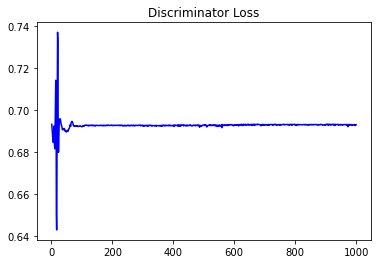

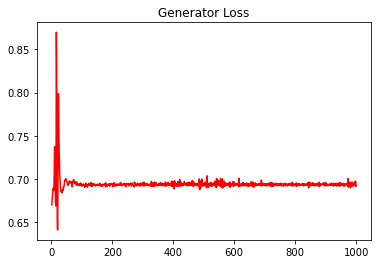

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.31850634841621867


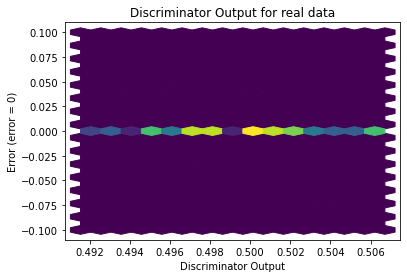

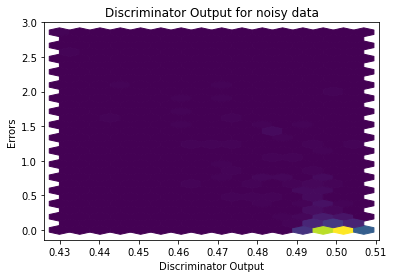

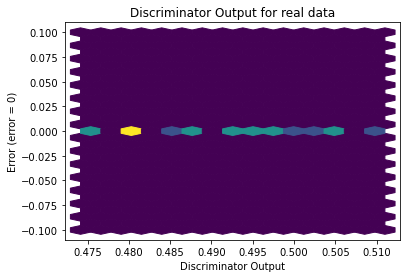

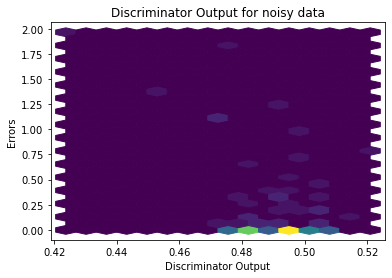

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


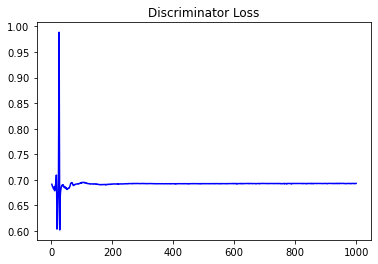

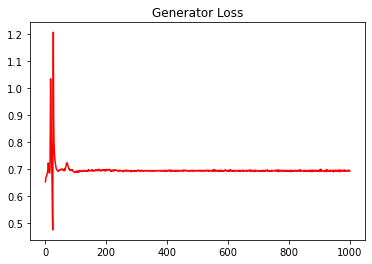

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.28143430743610376


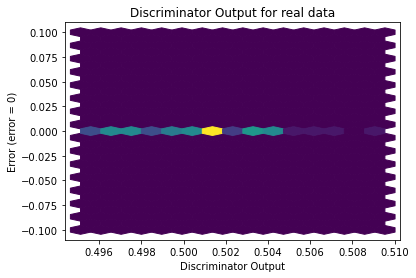

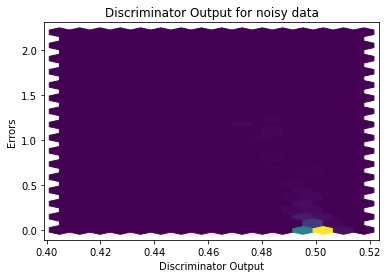

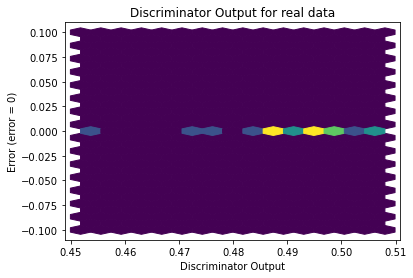

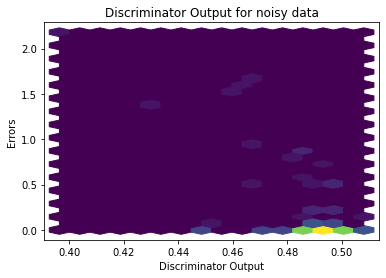

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7580]], requires_grad=True)
